In [3]:
# load numpy and pandas for data manipulation
import numpy as np
import pandas as pd

# load statsmodels as alias ``sm``
import statsmodels.api as sm

# load the longley dataset into a pandas data frame - first column (year) used as row labels
df = pd.read_csv('/content/regression_dataset.csv')
df.head()

,x_simple,y_simple,x1_multiple,x2_multiple,x3_multiple,y_multiple,x_poly,y_poly
0,37.454012,199.011001,79.481130,35.597268,14.299168,366.991911,3.560967,43.747073
1,95.071431,479.377006,50.263709,75.784611,76.151063,608.374021,9.865152,229.988703
2,73.199394,377.832186,57.690388,1.439349,61.821806,409.735124,6.057748,105.717550
3,59.865848,269.577864,49.251769,11.607264,10.112268,230.104405,2.372268,24.091695
4,15.601864,83.615882,19.524299,4.600264,8.410681,69.387534,1.017825,15.483240


In [4]:
df.isna().sum()

,0
x_simple,0
y_simple,0
x1_multiple,0
x2_multiple,0
x3_multiple,0
y_multiple,0
x_poly,0
y_poly,0


In [5]:
y = df.y_simple  # response/Target
X = df.x_simple  # predictor/input
X = sm.add_constant(X)  # Adds a constant term to the predictor
X.head()

,const,x_simple
0,1.0,37.454012
1,1.0,95.071431
2,1.0,73.199394
3,1.0,59.865848
4,1.0,15.601864


In [6]:
X.tail()

,const,x_simple
95,1.0,49.379560
96,1.0,52.273283
97,1.0,42.754102
98,1.0,2.541913
99,1.0,10.789143


In [8]:
est = sm.OLS(y,X)
est

In [9]:
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               y_simple   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     6411.
Date:                Mon, 28 Oct 2024   Prob (F-statistic):           4.14e-91
Time:                        15:48:26   Log-Likelihood:                -430.72
No. Observations:                 100   AIC:                             865.4
Df Residuals:                      98   BIC:                             870.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.3019      3.406      4.199      0.000       7.543      21.060
x_simple       4.9080      0.061     80.067      0.000       4.786       5.030
==============================================================================
Omnibus:                        0.900   Durbin-Watson:                   2.285
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.808
Skew:                           0.217   Prob(JB):                        0.668
Kurtosis:                       2.929   Cond. No.                         104.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
est.params

,0
const,14.301923
x_simple,4.908045


In [13]:
# Make sure that graphics appear inline in the iPython notebook
%pylab inline

# We pick 100 hundred points equally spaced from the min to the max
X_prime = np.linspace(X.x_simple.min(), X.x_simple.max(), 100)[:, np.newaxis]
X_prime = sm.add_constant(X_prime)  # add constant as we did before
X_prime

Populating the interactive namespace from numpy and matplotlib


array([[ 1.        ,  0.55221171],
       [ 1.        ,  1.54348931],
       [ 1.        ,  2.5347669 ],
       [ 1.        ,  3.5260445 ],
       [ 1.        ,  4.51732209],
       [ 1.        ,  5.50859969],
       [ 1.        ,  6.49987728],
       [ 1.        ,  7.49115488],
       [ 1.        ,  8.48243248],
       [ 1.        ,  9.47371007],
       [ 1.        , 10.46498767],
       [ 1.        , 11.45626526],
       [ 1.        , 12.44754286],
       [ 1.        , 13.43882045],
       [ 1.        , 14.43009805],
       [ 1.        , 15.42137564],
       [ 1.        , 16.41265324],
       [ 1.        , 17.40393083],
       [ 1.        , 18.39520843],
       [ 1.        , 19.38648603],
       [ 1.        , 20.37776362],
       [ 1.        , 21.36904122],
       [ 1.        , 22.36031881],
       [ 1.        , 23.35159641],
       [ 1.        , 24.342874  ],
       [ 1.        , 25.3341516 ],
       [ 1.        , 26.32542919],
       [ 1.        , 27.31670679],
       [ 1.        ,

In [15]:
# Now we calculate the predicted values
y_hat = est.predict(X_prime)
y_hat

array([ 17.01220328,  21.87743868,  26.74267408,  31.60790948,
        36.47314487,  41.33838027,  46.20361567,  51.06885106,
        55.93408646,  60.79932186,  65.66455726,  70.52979265,
        75.39502805,  80.26026345,  85.12549884,  89.99073424,
        94.85596964,  99.72120504, 104.58644043, 109.45167583,
       114.31691123, 119.18214662, 124.04738202, 128.91261742,
       133.77785282, 138.64308821, 143.50832361, 148.37355901,
       153.2387944 , 158.1040298 , 162.9692652 , 167.8345006 ,
       172.69973599, 177.56497139, 182.43020679, 187.29544219,
       192.16067758, 197.02591298, 201.89114838, 206.75638377,
       211.62161917, 216.48685457, 221.35208997, 226.21732536,
       231.08256076, 235.94779616, 240.81303155, 245.67826695,
       250.54350235, 255.40873775, 260.27397314, 265.13920854,
       270.00444394, 274.86967933, 279.73491473, 284.60015013,
       289.46538553, 294.33062092, 299.19585632, 304.06109172,
       308.92632711, 313.79156251, 318.65679791, 323.52

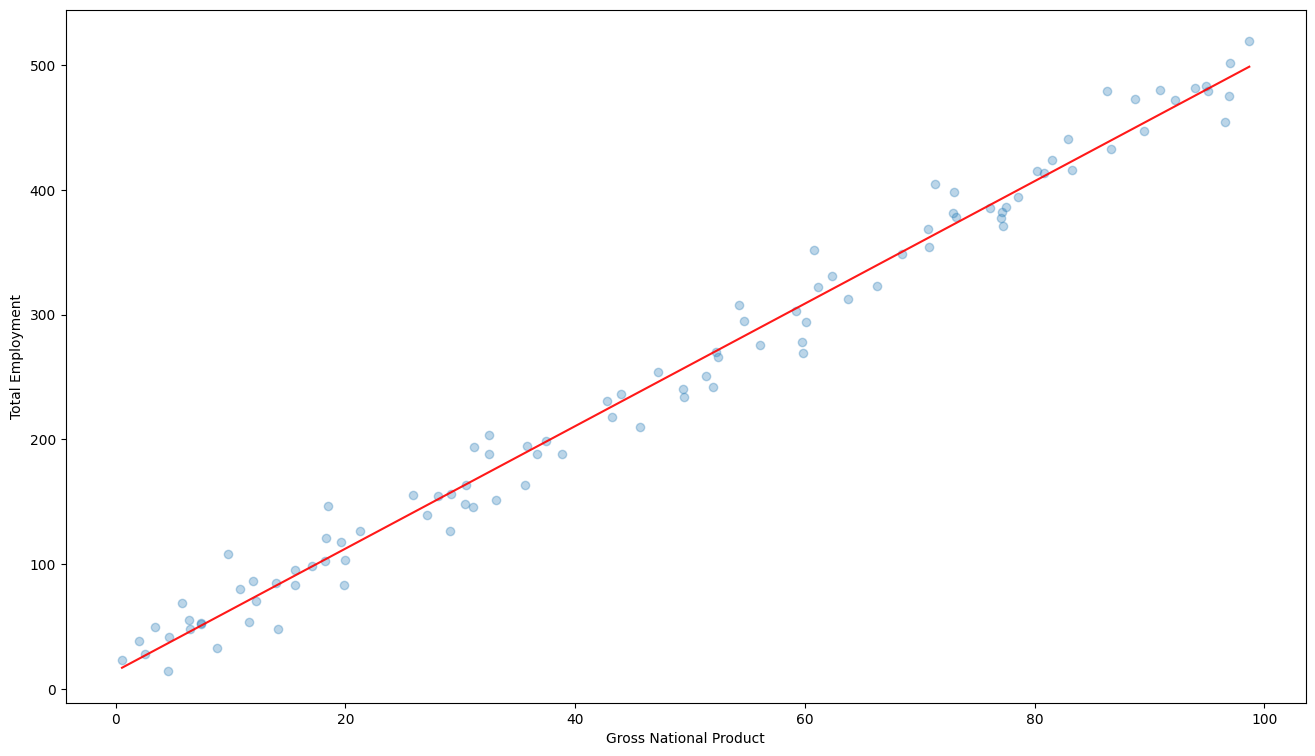

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
plt.scatter(X.x_simple, y, alpha=0.3)  # Plot the raw data
plt.xlabel("Gross National Product")
plt.ylabel("Total Employment")
plt.plot(X_prime[:, 1], y_hat, 'r', alpha=0.9)  # Add the regression line, colored in red

In [19]:
# import formula api as alias smf
import statsmodels.formula.api as smf

# formula: response ~ predictors
est = smf.ols(formula='y_simple ~ x_simple', data=df).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               y_simple   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     6411.
Date:                Mon, 28 Oct 2024   Prob (F-statistic):           4.14e-91
Time:                        15:52:03   Log-Likelihood:                -430.72
No. Observations:                 100   AIC:                             865.4
Df Residuals:                      98   BIC:                             870.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.3019      3.406      4.199      0.000       7.543      21.060
x_simple       4.9080      0.061     80.067      0.000       4.786       5.030
==============================================================================
Omnibus:                        0.900   Durbin-Watson:                   2.285
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.808
Skew:                           0.217   Prob(JB):                        0.668
Kurtosis:                       2.929   Cond. No.                         104.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

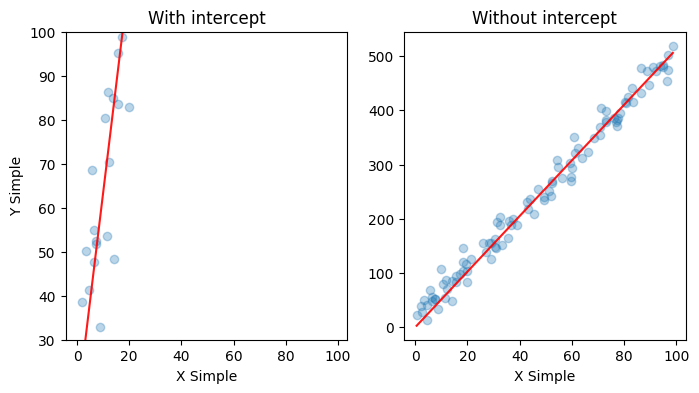

In [20]:
# Fit the no-intercept model
est_no_int = smf.ols(formula='y_simple ~ x_simple - 1', data=df).fit()

# We pick 100 hundred points equally spaced from the min to the max
X_prime_1 = pd.DataFrame({'x_simple': np.linspace(X.x_simple.min(), X.x_simple.max(), 100)})
X_prime_1 = sm.add_constant(X_prime_1)  # add constant as we did before

y_hat_int = est.predict(X_prime_1)
y_hat_no_int = est_no_int.predict(X_prime_1)

fig = plt.figure(figsize=(8,4))
splt = plt.subplot(121)

splt.scatter(X.x_simple, y, alpha=0.3)  # Plot the raw data
plt.ylim(30, 100)  # Set the y-axis to be the same
plt.xlabel("X Simple")
plt.ylabel("Y Simple")
plt.title("With intercept")
splt.plot(X_prime[:, 1], y_hat_int, 'r', alpha=0.9)  # Add the regression line, colored in red

splt = plt.subplot(122)
splt.scatter(X.x_simple, y, alpha=0.3)  # Plot the raw data
plt.xlabel("X Simple")
plt.title("Without intercept")
splt.plot(X_prime[:, 1], y_hat_no_int, 'r', alpha=0.9)  # Add the regression line, colored in red